In [1]:
# Importing the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pylab import rcParams

import matplotlib

In [2]:
# Parameters de Plots.
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams.update({'font.size': 18})
matplotlib.rcParams['figure.figsize'] = (15,8)

In [3]:
# Importint the Dataset.
dataset = pd.read_csv('social_network_ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
dataset.head(10)

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
5  15728773    Male   27            58000          0
6  15598044  Female   27            84000          0
7  15694829  Female   32           150000          1
8  15600575    Male   25            33000          0
9  15727311  Female   35            65000          0

In [4]:
# Splitting the dataset into the Training set and Test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state = 0)

In [5]:
# Feature Scaling.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float64))
X_test = sc.transform(X_test.astype(np.float64))

In [6]:
# Fitting K-NN to the Training set.
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [7]:
# Predicting the Test set results.
y_pred = classifier.predict(X_test)

In [8]:
# Making the Confusion Matrix.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix=\n{}\n'.format(cm))

# fpr
fpr = cm[0,1]/(sum(cm[0,:]))
print('FPR = %.3f \n' % fpr)

# tpr
fpr = cm[1,1]/(sum(cm[1,:]))
print('TPR = %.3f' % fpr)

Confusion matrix=
[[73  6]
 [ 4 37]]

FPR = 0.076 

TPR = 0.902


In [9]:
# ROC Curve parameters.
from sklearn import metrics
prob = classifier.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
roc_auc = metrics.auc(fpr, tpr)

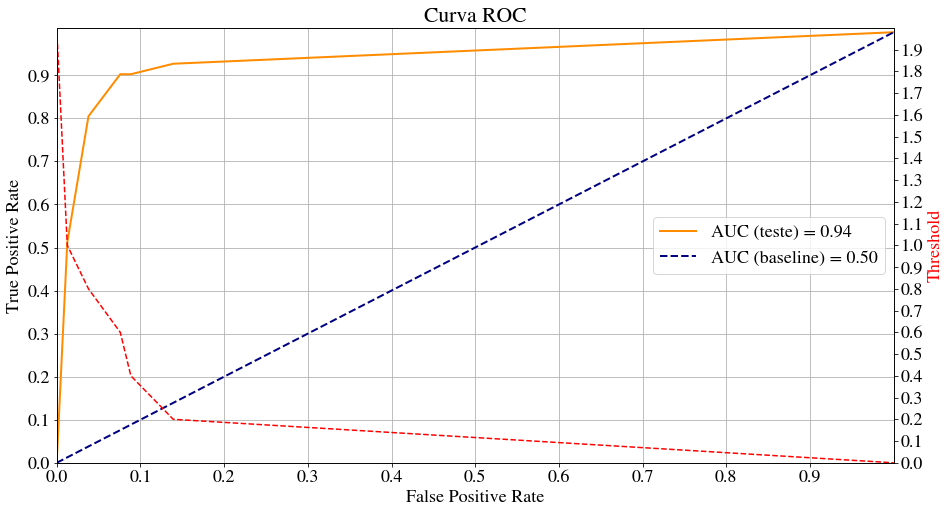

In [10]:
# ROC Curve Plot.
fig, ax1 = plt.subplots()
ax1.plot(fpr, tpr, color='darkorange', lw=2, label='AUC (teste) = %0.2f' % roc_auc)
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='AUC (baseline) = 0.50')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.01])
ax1.grid()
ax1.set_yticks(np.arange(0, 1, .1))
ax1.set_xticks(np.arange(0, 1, .1))
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Curva ROC')
ax1.legend(loc="right")

# create the axis of thresholds (scores)
ax2 = ax1.twinx()
ax2.plot(fpr, threshold, markeredgecolor='r',linestyle='dashed', color='r')
ax2.set_yticks(np.arange(0, 2, .1))
ax2.set_ylabel('Threshold',color='r')
ax2.set_ylim([threshold[-1],threshold[0]])
ax2.set_xlim([fpr[0],fpr[-1]])

plt.show()